In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv('220109COVID19MEXICO.csv',  low_memory=True)

C:\Users\CARLOS~1.LOZ\AppData\Local\R-MINI~1\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-01-09,z3d8f0,1,12,27,2,27,27,1,1,...,1,2,97,2,97,6,99,México,97,97
1,2022-01-09,z4e532,2,12,7,2,7,7,56,1,...,2,2,97,2,97,6,99,México,97,97
2,2022-01-09,z4e838,1,12,9,2,15,15,95,2,...,99,1,2,2,97,7,99,México,97,2
3,2022-01-09,z2b144,2,12,9,1,15,9,2,1,...,1,1,4,2,97,5,99,México,97,97
4,2022-01-09,zz7202,1,12,16,2,16,16,112,1,...,1,1,2,2,97,7,99,México,97,97


In [35]:
covid['EDAD'].describe()

count    1.271458e+07
mean     3.873017e+01
std      1.715877e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      2.510000e+02
Name: EDAD, dtype: float64

In [4]:
edades = covid['EDAD']

In [5]:
edades.max() - edades.min()

251

In [6]:
segmentos = pd.cut(edades, 25)

covid[['SEXO','EDAD']].groupby(['SEXO', segmentos]).count()

EDAD
SEXO EDAD                     
1    (-0.251, 10.04]    216203
     (10.04, 20.08]     538851
     (20.08, 30.12]    1592688
     (30.12, 40.16]    1477996
     (40.16, 50.2]     1268239
     (50.2, 60.24]      880267
     (60.24, 70.28]     437240
     (70.28, 80.32]     197654
     (80.32, 90.36]      74092
     (90.36, 100.4]      12474
     (100.4, 110.44]       842
     (110.44, 120.48]      184
     (120.48, 130.52]       47
     (130.52, 140.56]        0
     (140.56, 150.6]         1
     (150.6, 160.64]         0
     (160.64, 170.68]        0
     (170.68, 180.72]        0
     (180.72, 190.76]        0
     (190.76, 200.8]         0
     (200.8, 210.84]         0
     (210.84, 220.88]        0
     (220.88, 230.92]        0
     (230.92, 240.96]        0
     (240.96, 251.0]         1
2    (-0.251, 10.04]    242806
     (10.04, 20.08]     510648
     (20.08, 30.12]    1455083
     (30.12, 40.16]    1296825
     (40.16, 50.2]     1049297
     (50.2, 60.24]      756440
     (60.24, 70.28]     413715
     (70.28, 80.32]     203924
     (80.32, 90.36]      73225
     (90.36, 100.4]      10319
     (100.4, 110.44]       936
     (110.44, 120.48]     1043
     (120.48, 130.52]     3533
     (130.52, 140.56]        0
     (140.56, 150.6]         2
     (150.6, 160.64]         0
     (160.64, 170.68]        0
     (170.68, 180.72]        0
     (180.72, 190.76]        0
     (190.76, 200.8]         0
     (200.8, 210.84]         0
     (210.84, 220.88]        0
     (220.88, 230.92]        0
     (230.92, 240.96]        0
     (240.96, 251.0]         0

In [7]:
covid[['FECHA_SINTOMAS', 'CLASIFICACION_FINAL']].groupby(['FECHA_SINTOMAS', 'CLASIFICACION_FINAL']).size()

FECHA_SINTOMAS  CLASIFICACION_FINAL
2020-01-01      4                        2
                5                       20
                6                      132
                7                      133
2020-01-02      5                       18
                                      ... 
2022-01-08      6                      578
                7                      896
2022-01-09      3                        5
                6                       11
                7                        1
Length: 4815, dtype: int64

In [8]:
porfecha = covid.groupby(['FECHA_SINTOMAS', 'CLASIFICACION_FINAL'],as_index = False
                ).count().pivot('FECHA_SINTOMAS', 'CLASIFICACION_FINAL').fillna(0)
display(porfecha)

FECHA_ACTUALIZACION                                   \
CLASIFICACION_FINAL                   1    2        3    4     5       6   
FECHA_SINTOMAS                                                             
2020-01-01                          0.0  0.0      0.0  2.0  20.0   132.0   
2020-01-02                          0.0  0.0      0.0  0.0  18.0   113.0   
2020-01-03                          0.0  0.0      0.0  1.0  18.0   112.0   
2020-01-04                          0.0  0.0      0.0  0.0  14.0   107.0   
2020-01-05                          0.0  0.0      0.0  0.0  15.0   163.0   
...                                 ...  ...      ...  ...   ...     ...   
2022-01-05                        482.0  1.0  11206.0  1.0   9.0  3011.0   
2022-01-06                        340.0  0.0   6533.0  1.0   5.0  2394.0   
2022-01-07                        314.0  0.0   2816.0  0.0   3.0  1610.0   
2022-01-08                        121.0  0.0    546.0  0.0   0.0   578.0   
2022-01-09                          0.0  0.0      5.0  0.0   0.0    11.0   

                             ID_REGISTRO                ... PAIS_ORIGEN  \
CLASIFICACION_FINAL        7           1    2        3  ...           5   
FECHA_SINTOMAS                                          ...               
2020-01-01             133.0         0.0  0.0      0.0  ...        20.0   
2020-01-02             102.0         0.0  0.0      0.0  ...        18.0   
2020-01-03             116.0         0.0  0.0      0.0  ...        18.0   
2020-01-04             124.0         0.0  0.0      0.0  ...        14.0   
2020-01-05             171.0         0.0  0.0      0.0  ...        15.0   
...                      ...         ...  ...      ...  ...         ...   
2022-01-05           11856.0       482.0  1.0  11206.0  ...         9.0   
2022-01-06            8009.0       340.0  0.0   6533.0  ...         5.0   
2022-01-07            4350.0       314.0  0.0   2816.0  ...         3.0   
2022-01-08             896.0       121.0  0.0    546.0  ...         0.0   
2022-01-09               1.0         0.0  0.0      5.0  ...         0.0   

                                        UCI                                   \
CLASIFICACION_FINAL       6        7      1    2        3    4     5       6   
FECHA_SINTOMAS                                                                 
2020-01-01            132.0    133.0    0.0  0.0      0.0  2.0  20.0   132.0   
2020-01-02            113.0    102.0    0.0  0.0      0.0  0.0  18.0   113.0   
2020-01-03            112.0    116.0    0.0  0.0      0.0  1.0  18.0   112.0   
2020-01-04            107.0    124.0    0.0  0.0      0.0  0.0  14.0   107.0   
2020-01-05            163.0    171.0    0.0  0.0      0.0  0.0  15.0   163.0   
...                     ...      ...    ...  ...      ...  ...   ...     ...   
2022-01-05           3011.0  11856.0  482.0  1.0  11206.0  1.0   9.0  3011.0   
2022-01-06           2394.0   8009.0  340.0  0.0   6533.0  1.0   5.0  2394.0   
2022-01-07           1610.0   4350.0  314.0  0.0   2816.0  0.0   3.0  1610.0   
2022-01-08            578.0    896.0  121.0  0.0    546.0  0.0   0.0   578.0   
2022-01-09             11.0      1.0    0.0  0.0      5.0  0.0   0.0    11.0   

                              
CLASIFICACION_FINAL        7  
FECHA_SINTOMAS                
2020-01-01             133.0  
2020-01-02             102.0  
2020-01-03             116.0  
2020-01-04             124.0  
2020-01-05             171.0  
...                      ...  
2022-01-05           11856.0  
2022-01-06            8009.0  
2022-01-07            4350.0  
2022-01-08             896.0  
2022-01-09               1.0  

[740 rows x 266 columns]

In [9]:
porfecha['FECHA_ACTUALIZACION']

CLASIFICACION_FINAL,1,2,3,4,5,6,7
FECHA_SINTOMAS,,,,,,,
2020-01-01,0.0,0.0,0.0,2.0,20.0,132.0,133.0
2020-01-02,0.0,0.0,0.0,0.0,18.0,113.0,102.0
2020-01-03,0.0,0.0,0.0,1.0,18.0,112.0,116.0
2020-01-04,0.0,0.0,0.0,0.0,14.0,107.0,124.0
2020-01-05,0.0,0.0,0.0,0.0,15.0,163.0,171.0
...,...,...,...,...,...,...,...
2022-01-05,482.0,1.0,11206.0,1.0,9.0,3011.0,11856.0
2022-01-06,340.0,0.0,6533.0,1.0,5.0,2394.0,8009.0
2022-01-07,314.0,0.0,2816.0,0.0,3.0,1610.0,4350.0


In [10]:
defunciones = covid[['FECHA_DEF']].groupby('FECHA_DEF').size().to_frame('defunciones')

In [11]:
defunciones

,defunciones
FECHA_DEF,
2020-01-02,1
2020-01-03,5
2020-01-04,1
2020-01-05,2
2020-01-06,3
...,...
2022-01-06,100
2022-01-07,42
2022-01-08,12


In [12]:
porfecha['FECHA_ACTUALIZACION'].join(defunciones).fillna(0).to_csv('CovidPorFecha.csv', index=True,encoding='utf-8')

In [13]:
otrasenfermedades = covid[['FECHA_DEF', 'TABAQUISMO', 'RENAL_CRONICA', 
       'OBESIDAD', 'CARDIOVASCULAR', 'HIPERTENSION', 'INMUSUPR', 
       'ASMA', 'EPOC', 'DIABETES']].loc[covid['FECHA_DEF'] != '9999-99-99'].set_index('FECHA_DEF')

In [14]:
otrasenfermedades

,TABAQUISMO,RENAL_CRONICA,OBESIDAD,CARDIOVASCULAR,HIPERTENSION,INMUSUPR,ASMA,EPOC,DIABETES
FECHA_DEF,,,,,,,,,
2020-05-11,1,2,2,2,2,2,2,2,2
2020-07-19,98,98,98,98,98,98,98,98,98
2020-07-21,2,2,1,2,1,2,2,2,1
2020-01-08,2,2,2,2,2,1,2,2,2
2020-01-03,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
2021-10-03,2,2,1,2,2,2,2,2,2
2021-10-08,1,2,2,1,1,2,2,1,1
2021-10-11,2,2,2,2,2,2,2,2,2


In [15]:
otrasenfermedades.corr().to_csv('CovidCorr.csv', index=True,encoding='utf-8')

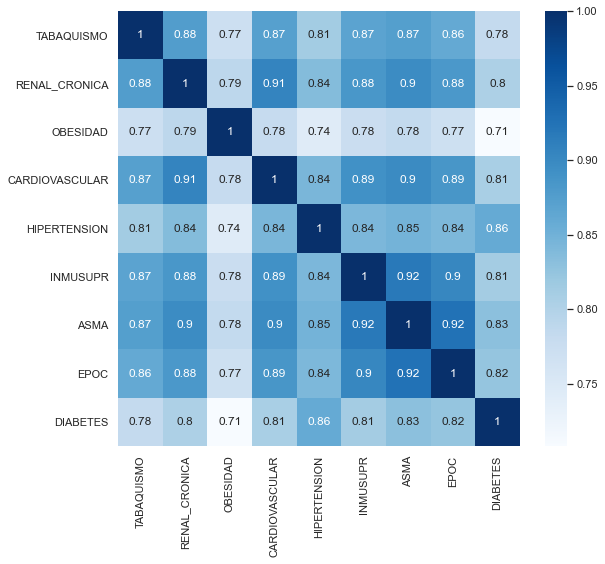

In [19]:
corr = otrasenfermedades.corr(method='pearson')
plt.figure(figsize = (9, 8))
sns.set(font_scale=1)
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2g')
sns.color_palette("light:b", as_cmap=True)
plt.show()
